<a href="https://colab.research.google.com/github/Khushbu-Pasi/ShadowFox/blob/main/Air_Quality_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/delhiaqi.csv')

In [5]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [6]:
df.tail()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47
560,2023-01-24 08:00:00,1134.87,8.61,56.89,80.11,110.63,123.76,140.26,5.51


In [7]:
df.dtypes

date      object
co       float64
no       float64
no2      float64
o3       float64
so2      float64
pm2_5    float64
pm10     float64
nh3      float64
dtype: object

In [8]:
df.isnull().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [9]:
df.shape

(561, 9)

In [10]:
df.columns

Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')

In [11]:
df.select_dtypes(include="number")

,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19
...,...,...,...,...,...,...,...,...
556,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
557,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
558,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
559,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [12]:
df.select_dtypes(include="object")

,date
0,2023-01-01 00:00:00
1,2023-01-01 01:00:00
2,2023-01-01 02:00:00
3,2023-01-01 03:00:00
4,2023-01-01 04:00:00
...,...
556,2023-01-24 04:00:00
557,2023-01-24 05:00:00
558,2023-01-24 06:00:00
559,2023-01-24 07:00:00


In [13]:
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062
std,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094
min,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000
25%,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000
50%,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000
75%,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000
max,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000


In [14]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [15]:
pollutants = df[['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].sum()

([<matplotlib.patches.Wedge at 0x7b267a381e40>,
 [Text(-0.8823887735726856, 0.6568029021501746, 'co'),
  Text(0.36727634684128235, -1.0368741895962703, 'no2'),
  Text(0.4380318344599915, -1.009023345616748, 'o3'),
  Text(0.4998717402337833, -0.9798613388207789, 'so2'),
  Text(0.749048612490199, -0.8055595422602277, 'pm2_5'),
  Text(1.0473222062840684, -0.3363275133322747, 'pm10'),
  Text(1.09983484786791, -0.01906062473717321, 'nh3')])

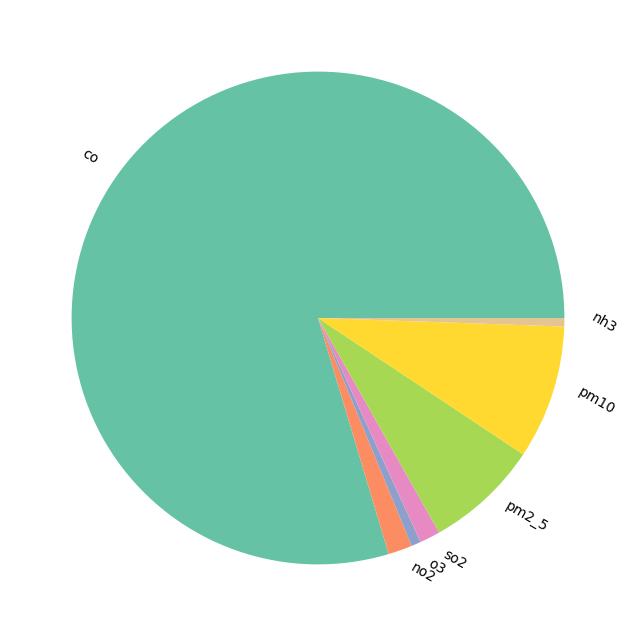

In [16]:
plt.figure(figsize=(8, 8))
sns.set_palette("Set2")
plt.pie(pollutants, labels=pollutants.index, textprops={'rotation': 330})

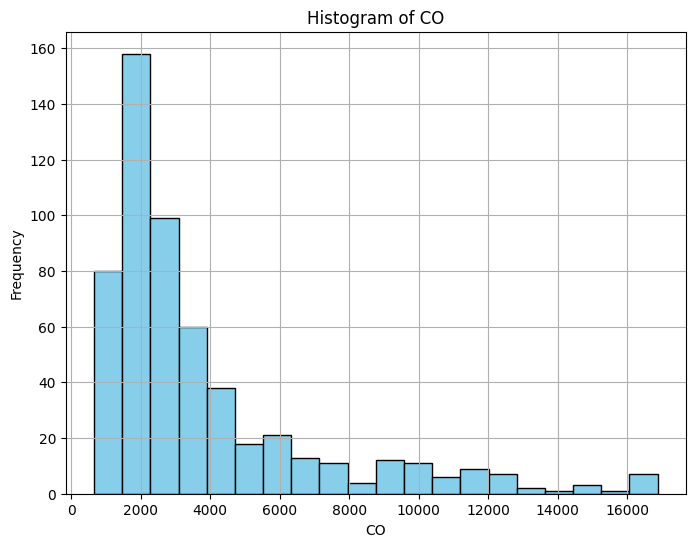

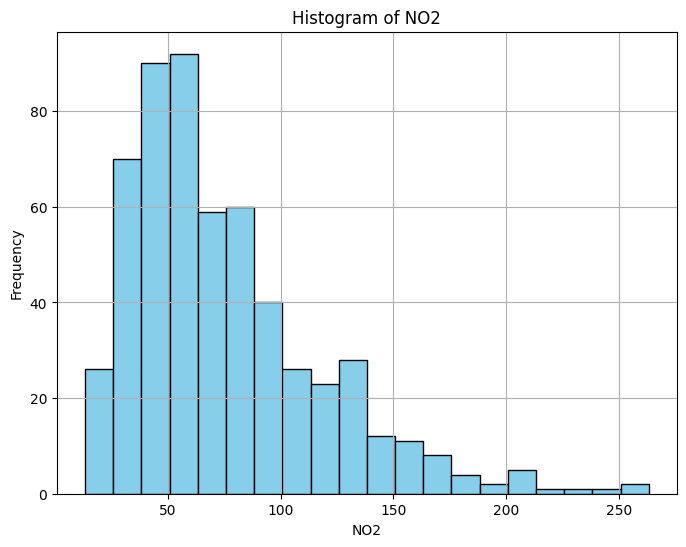

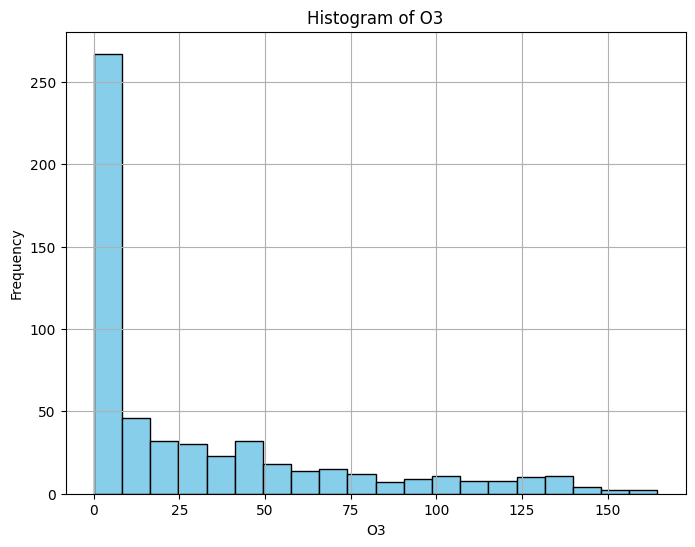

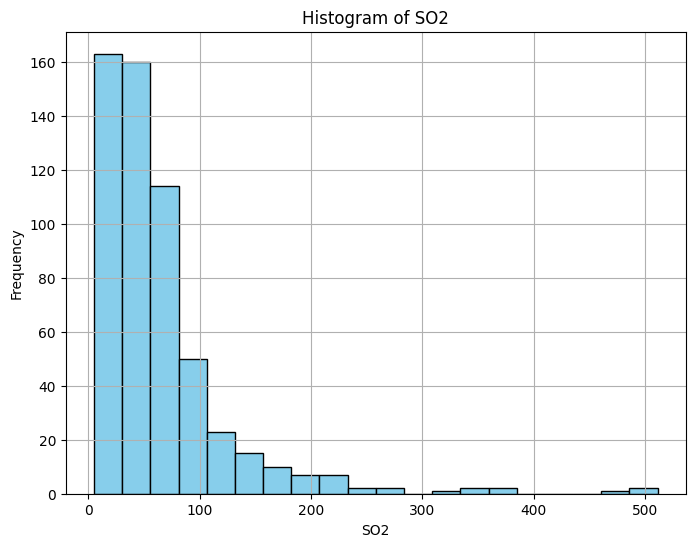

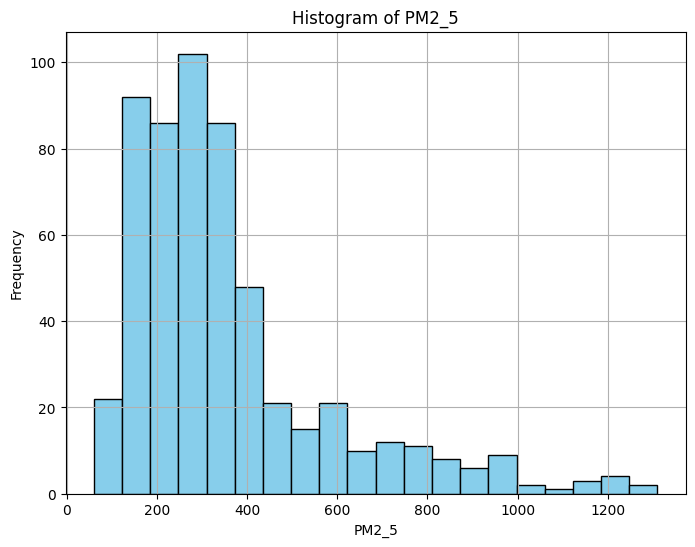

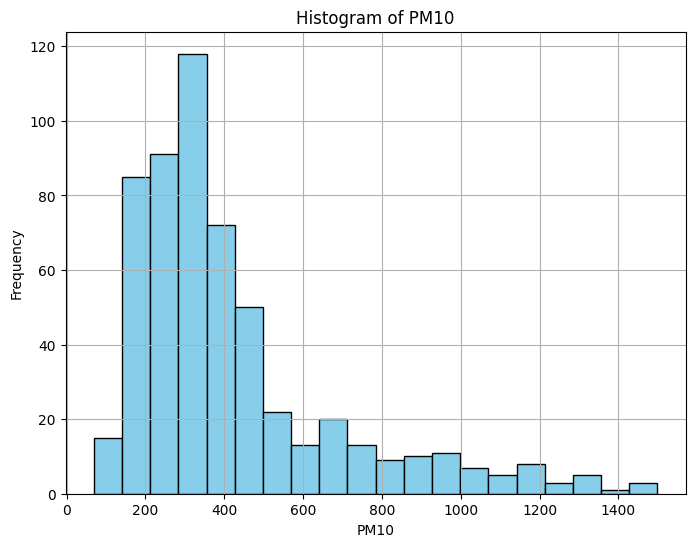

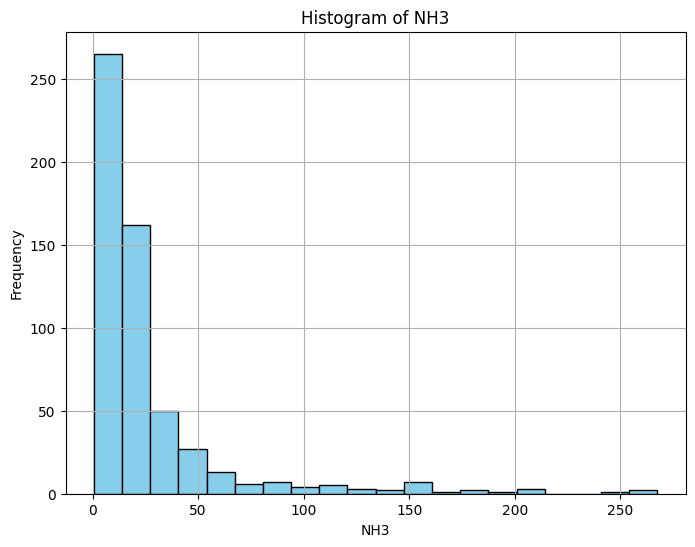

In [17]:
pollutants = ['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

for pollutant in pollutants:
    plt.figure(figsize=(8, 6))
    plt.hist(df[pollutant], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(pollutant.upper())
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {pollutant.upper()}')
    plt.grid(True)
    plt.show()

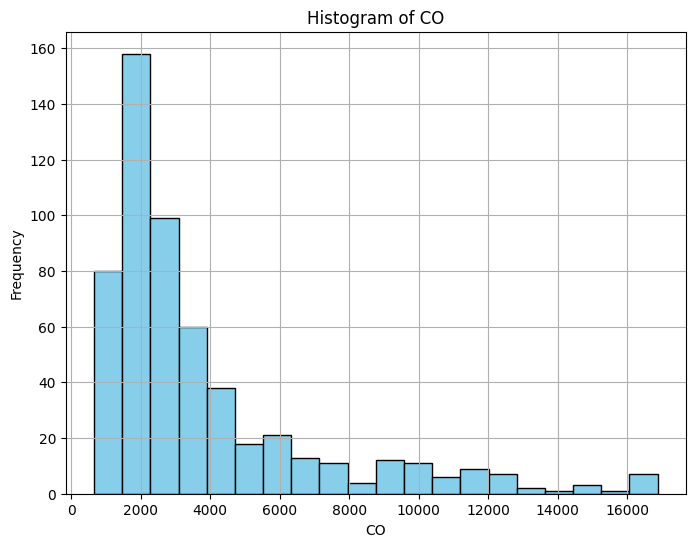

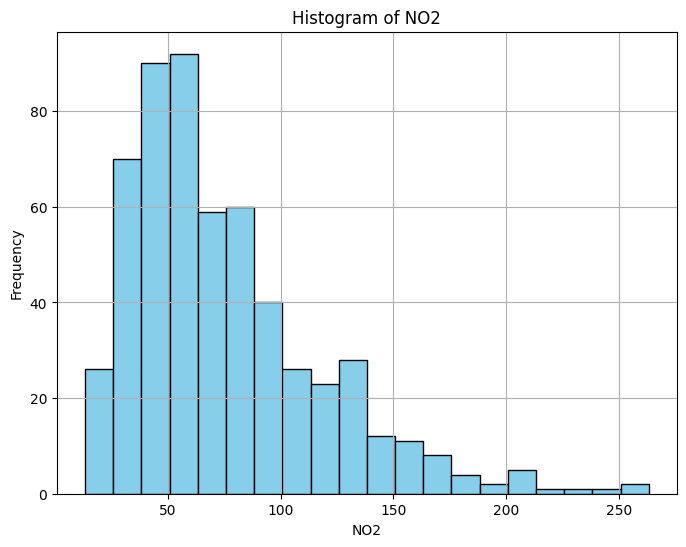

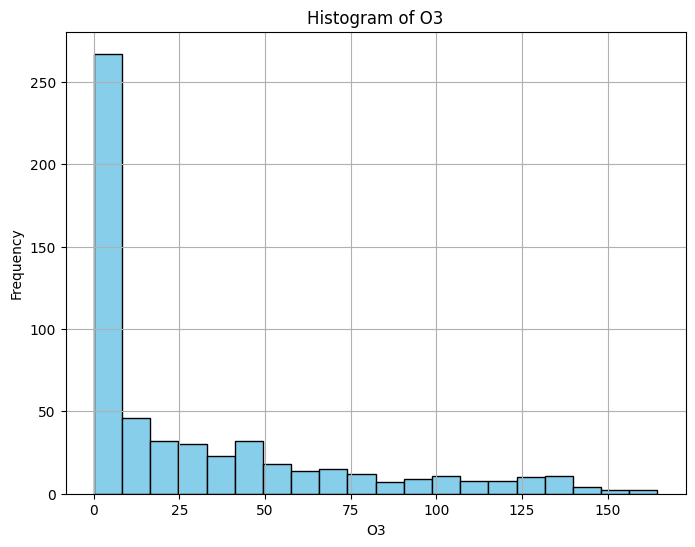

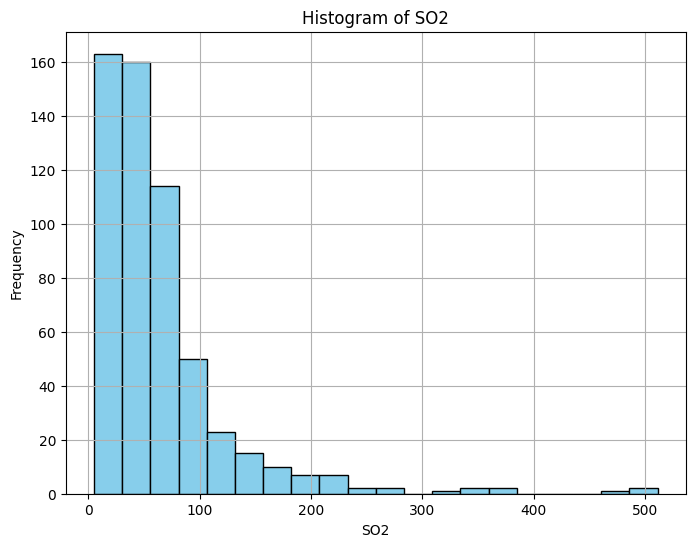

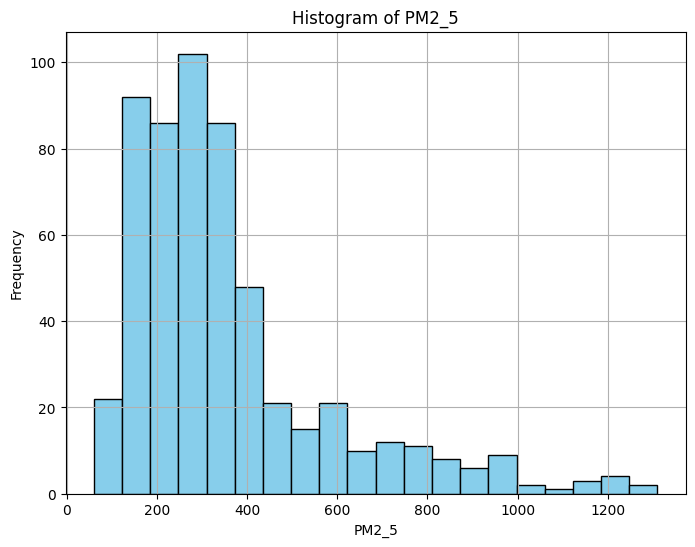

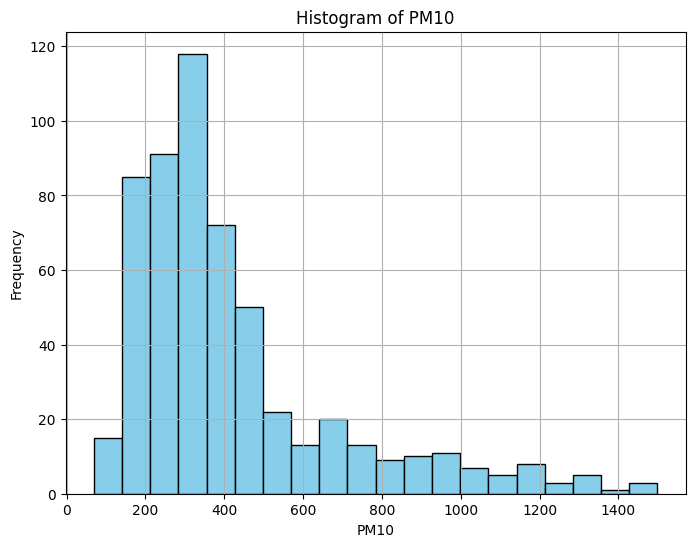

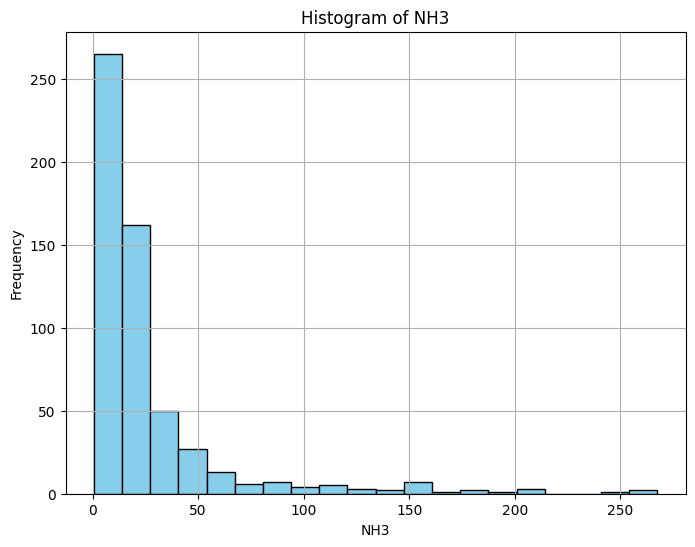

In [18]:
pollutants = ['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

for pollutant in pollutants:
    plt.figure(figsize=(8, 6))
    plt.hist(df[pollutant], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(pollutant.upper())
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {pollutant.upper()}')
    plt.grid(True)
    plt.show()

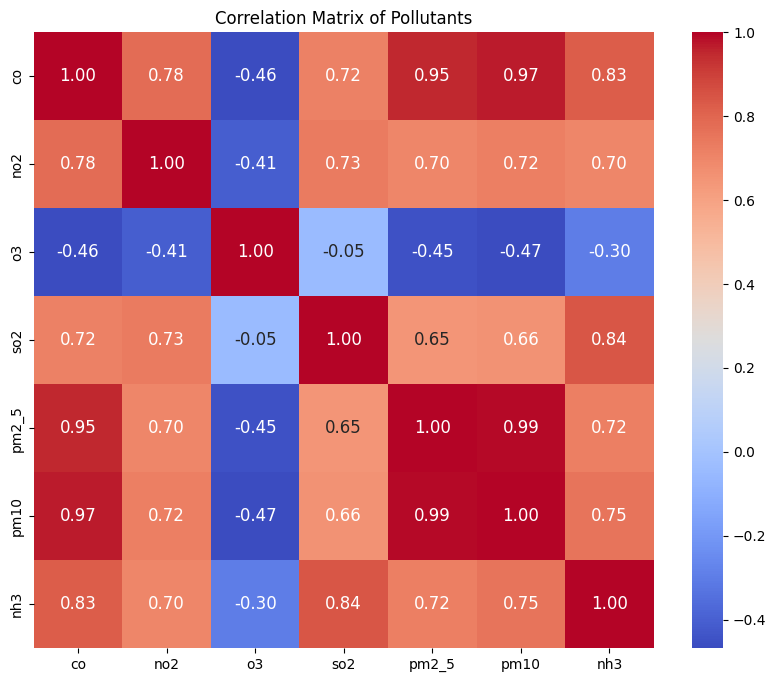

In [19]:
correlation_matrix = df[pollutants].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix of Pollutants')
plt.show()

In [20]:
df['date'] = pd.to_datetime(df['date'])


df['year'] = df['date'].dt.year.astype('category')
df['month'] = df['date'].dt.month.astype('category')
df['day'] = df['date'].dt.day.astype('category')


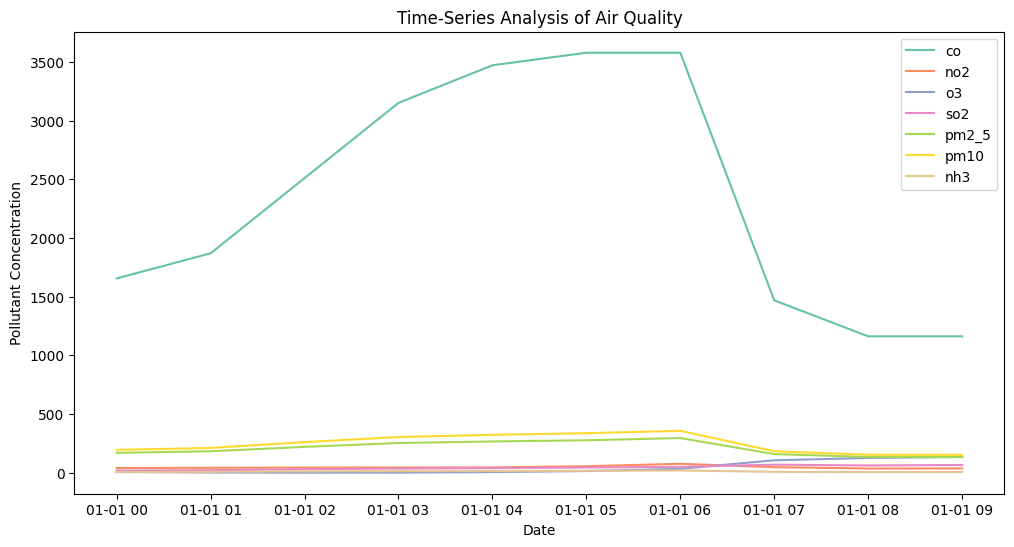

In [21]:
df.set_index('date', inplace=True)


pollutants = ['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
df = df.iloc[:10]
plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    plt.plot(df.index, df[pollutant], label=pollutant)

plt.xlabel('Date')
plt.ylabel('Pollutant Concentration')
plt.title('Time-Series Analysis of Air Quality')
plt.legend()
plt.show()

In [22]:
aqi_breakpoints = {
    'co': [0, 4.4, 9.4, 12.4, 15.4, 30.4, 40.4],
    'no2': [0, 53, 100, 360, 649, 1249, 1649],
    'o3': [0, 54, 70, 85, 105, 200, 404],
    'so2': [0, 35, 75, 185, 304, 604, 1004],
    'pm2_5': [0, 12, 35.4, 55.4, 150.4, 250.4, 350.4],
    'pm10': [0, 54, 154, 254, 354, 424, 604],
    'nh3': [0, 53, 104, 154, 204, 304, 404]
}

def calculate_aqi(row):
    max_aqi = 0
    for pollutant in aqi_breakpoints:
        concentration = row[pollutant]
        breakpoints = aqi_breakpoints[pollutant]
        index = next((i for i, x in enumerate(breakpoints) if x >= concentration), len(breakpoints) - 1)
        aqi = ((breakpoints[index] - breakpoints[index - 1]) / (concentration - breakpoints[index - 1])) * (index - 1) + breakpoints[index - 1]
        if aqi > max_aqi:
            max_aqi = aqi
    return max_aqi


df['AQI'] = df.apply(calculate_aqi, axis=1)

df.tail(20)

,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,day,AQI
date,,,,,,,,,,,,
2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,2023,1,1,171.575225
2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,2023,1,1,162.730456
2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,2023,1,1,298.910180
2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,2023,1,1,450.400000
2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,2023,1,1,281.728321
2023-01-01 05:00:00,3578.19,64.37,55.52,14.13,44.35,276.54,336.79,16.21,2023,1,1,269.527774
2023-01-01 06:00:00,3578.19,46.94,76.09,33.26,50.54,295.40,357.07,19.25,2023,1,1,445.205212
2023-01-01 07:00:00,1468.66,9.83,47.30,105.86,68.66,158.83,182.61,7.09,2023,1,1,546.860465
2023-01-01 08:00:00,1161.58,5.81,35.99,125.89,61.99,134.39,153.47,5.51,2023,1,1,123.190522


In [23]:
def categorize_aqi(aqi):
    if 0 <= aqi <= 50:
        return 'Good'
    elif 51 <= aqi <= 100:
        return 'Satisfactory'
    elif 101 <= aqi <= 200:
        return 'Moderately Polluted'
    elif 201 <= aqi <= 300:
        return 'Poor'
    elif 301 <= aqi <= 400:
        return 'Very Poor'
    elif 401 <= aqi <= 500:
        return 'Severe'
    else:
        return 'Invalid AQI Value'


df['Air Quality Category'] = df['AQI'].apply(categorize_aqi)

df.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,day,AQI,Air Quality Category
date,,,,,,,,,,,,,
2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,2023,1,1,171.575225,Moderately Polluted
2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,2023,1,1,162.730456,Moderately Polluted
2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,2023,1,1,298.910180,Poor
2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,2023,1,1,450.400000,Severe
2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,2023,1,1,281.728321,Poor
